<h1> Data Preprocessing <h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
data = pd.read_csv('../data/Train_call.txt',delimiter = '\t')
labels = pd.read_csv('../data/Train_clinical.txt',delimiter = '\t')

In [3]:
data.head()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0


In [4]:
data = data.transpose()

In [5]:
#Removing Misc. Details
drop = ['Start','End','Chromosome','Nclone']
for item in drop:
    data.drop(item ,axis = 0, inplace = True)


In [6]:
data = data.reset_index()

In [7]:
data.rename(columns = {'index':'Sample'},inplace = True)
data.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
labels.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [9]:
#Combine Features and Class Labels
combined = pd.merge(labels,data, on="Sample")
combined.head()

,Sample,Subgroup,0,1,2,3,4,5,6,7,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,HER2+,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,HR+,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,HR+,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,Triple Neg,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,Triple Neg,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


<h1> Testing a Model <h1>

#### No feature Selection, No cross Validation

In [10]:
#Label encode subgroup
le = preprocessing.LabelEncoder()
combined['Subgroup'] = le.fit_transform(combined['Subgroup'])

X = combined.iloc[0:2836,2:2836]
Y = combined['Subgroup']
#X.head()
#Y.head()
combined.head()

,Sample,Subgroup,0,1,2,3,4,5,6,7,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,2,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,2,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [11]:
combined

,Sample,Subgroup,0,1,2,3,4,5,6,7,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,2,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,2,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
96,Array.123,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
97,Array.100,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
98,Array.134,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


### Random Forest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = .7, random_state = 42)
print('X_train',len(X_train))
print('X_test', len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train 70
X_test 30
y_train 70
y_test 30


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ROCAUC

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(len(rf_predictions))
print('Accuracy:')
accuracy_score(y_test, rf_predictions,normalize=True, sample_weight=None)

30
Accuracy:


0.7333333333333333

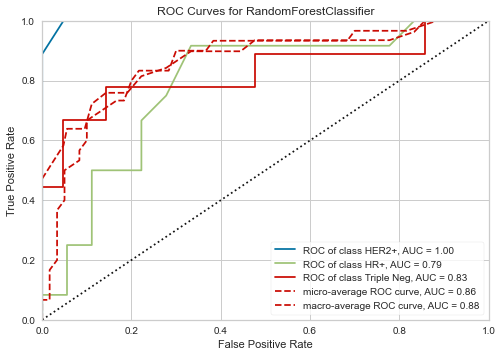

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
model = RandomForestClassifier()
visualizer = ROCAUC(model, classes=["HER2+","HR+","Triple Neg"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### XGBoost

In [16]:
import xgboost as xgb

In [17]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)
predictions = xgb_cl.predict(X_test)

In [18]:
print('Accuracy:')
accuracy_score(y_test, predictions,normalize=True, sample_weight=None)

Accuracy:


0.7333333333333333

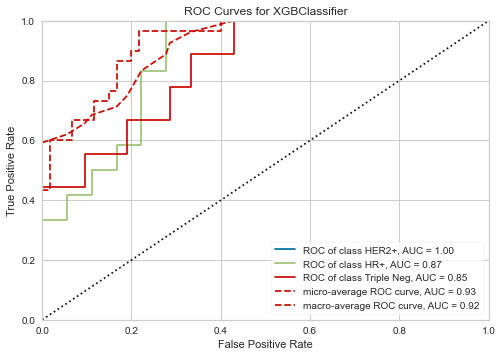

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
model = xgb.XGBClassifier()
visualizer = ROCAUC(model, classes=["HER2+","HR+","Triple Neg"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

def decoder(item):
    if item == 1:
        item = 'HER2+'
    elif item == 2:
        item = 'HR+'
    else:
        item = 'Triple Neg'
    return item
predictions = [decoder(item) for item in rf_predictions]
real = [decoder(item) for item in y_test]
print(predictions)
for i in range(0,len(rf_predictions)):
    print('Prediction: ',predictions[i],'True Value: ',real[i])

<h1> Feature Selection <h1> 

### Can grab feature importances on model by model basis (just an example):

In [23]:
importances  = xgb_cl.feature_importances_

In [24]:
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

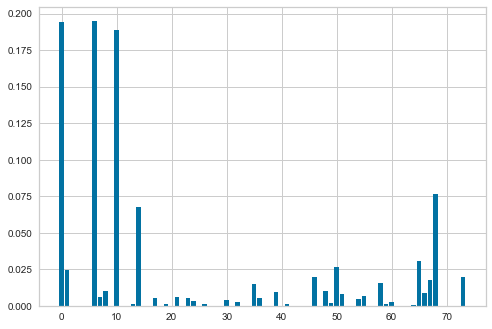

In [51]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [21]:
sig_cutoff = 0.002
more_imp = pd.DataFrame()
for i in range(0,len(importances)):
    if importances[i] >= sig_cutoff:
        x = pd.DataFrame({str(i):[importances[i]]})
        more_imp = pd.concat([more_imp, x],axis = 1)
more_imp = more_imp.transpose()

more_imp = more_imp.reset_index()
more_imp.columns = ['index', 'Significance']
more_imp = more_imp.sort_values(by='Significance',ascending = False)
more_imp.drop('index',axis =1, inplace = True)
more_imp.head(10)

,Significance
12,0.158865
43,0.076568
26,0.068817
30,0.050578
14,0.049391
1,0.048973
51,0.042389
36,0.041456
3,0.034226
27,0.024436


<h1> Model Agnostic Feature Selection <h1>

### Order Features by magnitude of correlation with the class label 

In [22]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [23]:
combined.head()

,Sample,Subgroup,0,1,2,3,4,5,6,7,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,2,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,2,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [24]:
importances = combined.drop(['Subgroup','Sample'],axis=1).apply(lambda x: x.corr(combined.Subgroup))
indices = np.argsort(importances)
#print(importances[indices])
importances = pd.DataFrame(importances)
importances.columns = ['Correlation with target']
importances = importances.sort_values(by = 'Correlation with target',ascending = False)
importances.head(20)

,Correlation with target
2213,0.428226
2214,0.419049
2210,0.402231
2219,0.387035
1001,0.383845
2223,0.376419
1000,0.374540
999,0.371324
2220,0.371073
2207,0.369161


### Similar to correlation: Mutal Information measures the dependency between each feature and class label

In [25]:
#Mutual info classification
mi = mutual_info_classif(X,Y)
mi

array([0.01967931, 0.12328726, 0.05441066, ..., 0.03914397, 0.04434669,
       0.02954824])

In [26]:
mi = pd.DataFrame(mi)
mi.index = X.columns
mi.head()

,0
0,0.019679
1,0.123287
2,0.054411
3,0.018739
4,0.042676


In [27]:
mi.columns = ['Info Gain']
mi = mi.sort_values(by = 'Info Gain',ascending = False)
mi.head(20)

,Info Gain
2184,0.558125
1674,0.281651
2133,0.269942
449,0.237404
94,0.210337
2113,0.206701
1661,0.205918
854,0.203169
2538,0.200482
1664,0.198266


<h1> Retrain RF and XGB using subsets of top features from Correlations and Mutual Information <h1>

### Should use cross validation here to select # of features for model

In [28]:
#Use cross validaton here, but choosing 40 features from both categories for now

In [29]:
#Get 40 features from both feature extraction approaches and combine them into one list
mi_list = mi.index[0:40]
importances_list = list(importances.index[0:20])
[importances_list.append(item) for item in importances.index[2814:]]
[importances_list.append(item) for item in mi_list]
imp_features = importances_list

print(len(imp_features))

80


In [30]:
#Remove duplicates
imp_features = set(imp_features)
print(len(imp_features))


74


In [31]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [32]:
#Pull significant features out of original X df
imp_features = list(imp_features)
new_X = X[imp_features]

In [33]:
new_X.head()


,1664,384,1666,1667,1668,1669,1670,775,2056,1672,...,1004,488,1262,2547,1656,1659,1660,1661,1662,1663
0,1,0,1,1,1,1,1,0,-1,0,...,-1,0,0,0,1,1,1,1,1,1
1,2,0,-1,1,1,0,-1,0,0,-1,...,-1,0,0,0,2,0,0,-1,2,2
2,0,0,0,0,0,0,0,0,-1,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,1,-1,-1,-1,-1,-1,0,1,-1,...,0,0,-1,0,-1,-1,-1,-1,-1,-1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(new_X,Y, train_size = .7, random_state = 42)
print('X_train',len(X_train))
print('X_test', len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))


X_train 70
X_test 30
y_train 70
y_test 30


### Retrained RF (Little improvement)

In [35]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(len(rf_predictions))
print('Accuracy:')
accuracy_score(y_test, rf_predictions,normalize=True, sample_weight=None)

30
Accuracy:


0.8

### Retrained XGB Classifier (Decent improvement)

In [36]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)
predictions = xgb_cl.predict(X_test)
print('Accuracy:')
accuracy_score(y_test, predictions,normalize=True, sample_weight=None)

[15:15:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy:


0.8

[15:15:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


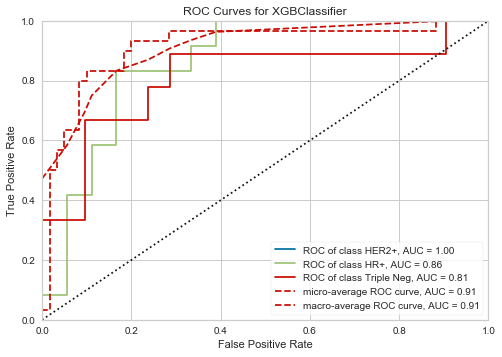

In [37]:
model = xgb.XGBClassifier()
visualizer = ROCAUC(model, classes=["HER2+","HR+","Triple Neg"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Features of greatest importance to XGBoost Model

In [38]:
importances = xgb_cl.feature_importances_
importances

array([0.19404906, 0.02455897, 0.        , 0.        , 0.        ,
       0.        , 0.19484213, 0.00610395, 0.01012209, 0.        ,
       0.18857892, 0.        , 0.        , 0.00140645, 0.06727903,
       0.        , 0.        , 0.00505063, 0.        , 0.00127901,
       0.        , 0.0061114 , 0.        , 0.00565933, 0.00361938,
       0.        , 0.00147795, 0.        , 0.        , 0.        ,
       0.00414371, 0.        , 0.00292888, 0.        , 0.        ,
       0.01459049, 0.0054404 , 0.        , 0.        , 0.00945876,
       0.        , 0.00146903, 0.        , 0.        , 0.        ,
       0.        , 0.01950824, 0.        , 0.01025742, 0.00170154,
       0.0262729 , 0.00804988, 0.        , 0.        , 0.00452519,
       0.00693557, 0.        , 0.        , 0.01583676, 0.00124538,
       0.00281735, 0.        , 0.        , 0.        , 0.00055546,
       0.03086571, 0.0089203 , 0.01780369, 0.07675167, 0.        ,
       0.        , 0.        , 0.        , 0.01978342], dtype=

In [39]:
columns = list(new_X.columns)
n = 0
turn = []
for item in importances:
    add = [columns[n],item]
    turn.append(add)
    n+=1
xgb_imp_features = pd.DataFrame(turn)
xgb_imp_features.columns = ['Feature','Importance']




In [40]:
xgb_imp_features = xgb_imp_features.sort_values(by = 'Importance',ascending = False)
xgb_imp_features.head()

,Feature,Importance
6,1670,0.194842
0,1664,0.194049
10,2184,0.188579
68,1656,0.076752
14,1679,0.067279


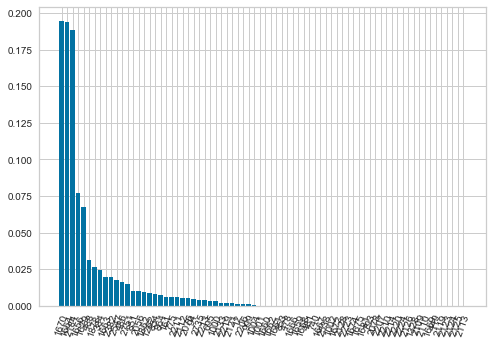

In [41]:
plt.bar([x for x in range(len(xgb_imp_features['Feature']))], xgb_imp_features['Importance'])
plt.xticks(ticks = np.arange(0,74),labels = list(xgb_imp_features['Feature']),rotation = 70)
plt.show()

<h1> Hyper Parameter Tuning on Validation Set Using RandomizedSearchCV <h1>

In [42]:
# Split the data in training and remaining dataset, train size = 60%
X_train, X_rem, y_train, y_rem = train_test_split(new_X,Y, train_size=0.6)
# Split remaining 50/50 into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(60, 74)
(60,)
(20, 74)
(20,)
(20, 74)
(20,)


(None, None)

In [43]:
#Hyper Parameter selection using GridSearchCV on validation data

grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

rs_model = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1, random_state=42),
                              param_distributions = grid,n_iter = 8,cv=5,verbose=10, scoring = 'accuracy',
                             return_train_score = True)
rs_model.fit(X_valid,y_valid)
rs_model.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 1/8] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=(train=0.875, test=0.500) total time=   0.7s
[CV 2/5; 1/8] START colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3
[15:15:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 1/8] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=(train=0.812, test=0.500) total time=   0.6s
[CV 3/5; 1/8] START colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3
[15:15:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 1/8] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=(train=0.750, test=0.250) total time=   0.1s
[CV 4/5; 1/8] START colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3
[15:15:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed fro

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 1/8] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=(train=0.750, test=0.500) total time=   0.1s
[CV 5/5; 1/8] START colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3
[15:15:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 1/8] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3;, score=(train=0.688, test=0.750) total time=   0.1s
[CV 1/5; 2/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7
[15:15:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 2/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=(train=0.438, test=0.250) total time=   0.3s
[CV 2/5; 2/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7
[15:15:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 2/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=(train=0.438, test=0.250) total time=   0.1s
[CV 3/5; 2/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7
[15:15:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merro

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 2/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 4/5; 2/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7
[15:15:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 2/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 5/5; 2/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7
[15:15:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merro

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-package

[CV 1/5; 3/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5
[15:15:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 3/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=(train=0.438, test=0.250) total time=   0.7s
[CV 2/5; 3/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5
[15:15:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 3/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=(train=0.438, test=0.250) total time=   0.9s
[CV 3/5; 3/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5
[15:15:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 3/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 4/5; 3/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5
[15:15:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed fro

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-package

[CV 5/5; 3/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=5;, score=(train=0.375, test=0.500) total time=   0.2s
[CV 1/5; 4/8] START colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7
[15:15:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 4/8] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=(train=0.438, test=0.250) total time=   0.1s
[CV 2/5; 4/8] START colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7
[15:15:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 4/8] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=(train=0.438, test=0.250) total time=   0.7s
[CV 3/5; 4/8] START colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7
[15:15:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'm

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 4/8] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   0.7s
[CV 5/5; 4/8] START colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7
[15:15:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5; 4/8] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   1.0s
[CV 1/5; 5/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7
[15:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 5/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=(train=0.438, test=0.250) total time=   0.1s
[CV 2/5; 5/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7
[15:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'm

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 5/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=(train=0.438, test=0.250) total time=   0.1s
[CV 3/5; 5/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7
[15:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 5/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 4/5; 5/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7
[15:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'm

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 5/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 5/5; 5/8] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7
[15:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 5/8] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7;, score=(train=0.375, test=0.500) total time=   0.1s
[CV 1/5; 6/8] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1
[15:15:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'm

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 6/8] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 2/5; 6/8] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1
[15:15:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 6/8] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/5; 6/8] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1
[15:15:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'm

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 6/8] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=(train=1.000, test=0.750) total time=   0.2s
[CV 4/5; 6/8] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1
[15:15:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 6/8] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 5/5; 6/8] START colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 6/8] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 1/5; 7/8] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1
[15:15:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 7/8] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 2/5; 7/8] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1
[15:15:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 7/8] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 3/5; 7/8] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1
[15:15:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 7/8] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=(train=1.000, test=0.500) total time=   0.3s
[CV 4/5; 7/8] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1
[15:15:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 7/8] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=(train=1.000, test=0.500) total time=   0.4s
[CV 5/5; 7/8] START colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1
[15:15:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5; 7/8] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 1/5; 8/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3
[15:15:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 8/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=(train=0.875, test=0.250) total time=   0.4s
[CV 2/5; 8/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3
[15:15:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 8/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=(train=0.750, test=0.750) total time=   0.3s
[CV 3/5; 8/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3
[15:15:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 8/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=(train=0.625, test=0.250) total time=   0.5s
[CV 4/5; 8/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3
[15:15:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 8/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=(train=0.750, test=0.500) total time=   0.4s
[CV 5/5; 8/8] START colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3
[15:15:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5; 8/8] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3;, score=(train=0.688, test=0.750) total time=   0.4s
[15:15:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [44]:
model = xgb.XGBClassifier({'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.3})

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:502: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


In [45]:
model.fit(X_train,y_train)

[15:15:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
predictions = model.predict(X_test)

In [47]:
print('Accuracy:')
accuracy_score(y_test, predictions,normalize=True, sample_weight=None)

Accuracy:


0.85

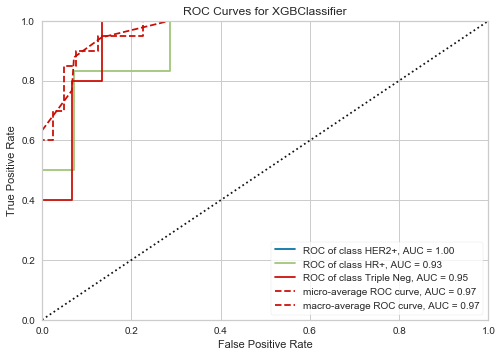

In [48]:
visualizer = ROCAUC(model, classes=["HER2+","HR+","Triple Neg"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()